# Introduction to Data Science and Systems 2019-2020<small><small>v20192020a</small></small>
## Lab 1: Vectors and matrices [assessed]

#### University of Glasgow, BSJ* & JHW, 2019

## Purpose of this lab
This lab should help you:
* understand how data can be represented as points in vector space
* understand the effect of different vector norms
* apply the inner product to compute the angle between vectors
* apply linear maps to data/vectors (in particular maps that reduce dimensionality) and visualise the result

## Guide

The notebook is structured as follows (with three main sections):
-    **Introduction (including a mini-taks)**-
-    **Task A: Dataset**
-    **Task B: Analysis**
-    **Task C: Applying linear maps to a dataset (for visualisation)**
-    **Appendix: Marking Summary (and additional metadata)**
    
We recommned you read through the lab *carefully* and work through the tasks.

#### Material and resources 
- It is recommended to keep the lecture notes (from lecture 1 and lecture 2) open while doing this lab exercise. 
    * ... and you should of course be prepared to access some of the recommended material.
- If you are stuck, the following resources are very helpful:
 * [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy/NumPy.md)
 * [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
 * [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)

#### Marking and Feedback
This asessed lab is marked using three different techniques;

- Autograded with feedback; you'll get immediate feedback.
- Autograded without (immediate) feedback (there will allways be a small demo/test so you can be confident that the format of your answer is correct).
- Manually graded (by an actual human). These types of question generates an pdf and/or tex file that must be uploaded to Moodle alongside the notebook. We do not provided individual feedback, but a model solution will be provided so you can see what was expected.

*Note*: auto-graded results are always provsional and subject to change in case there are significant issues (this will usually be in the favor of the student).

#### Help \& Assistance
- This lab is graded and the lab assistants/lecturer can provide guidance but we can (and will) not give you the final answer or confirm your result.

#### Plagarishm
- All submissions will be automatically compared against each other so make sure your submission represents an independent piece of work! We have provided a few hecks to make sure that is indeed the case.


---

Let's import some useful Python packages and define a few custom functions...

In [3]:
# Standard imports
# Make sure you run this cell!
# NumPy
import numpy as np  
import binascii
import os
import sys
from uuid import getnode as get_mac

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)

# custom utils (you do not need to understand this!) 
from jhwutils.checkarr import array_hash, check_hash
import jhwutils.image_audio as ia
import jhwutils.tick as tick

tick.reset_marks()
tick_hidden = 0
tick_hidden_pass = 0

def case_crc(s, verbose=True):
    h_crc =  binascii.crc32(bytes(s.lower(), 'ascii'))
    if verbose:
        print(h_crc)
    return h_crc

# this command generaties a unique key for your system/computer/account
uuid_simple = (("%s") % get_mac())
uuid_str = ("%s\n%s\n%s\n%s\n%s\n") % (os.path,sys.path,sys.version,sys.version_info,get_mac())
uuid_system = case_crc(uuid_str,verbose=False) 

# ignore any warnings below, they don't affect the results
print("Everything imported OK")

Everything imported OK


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Your Details \& Declaration of Originality

**Mini-task**: provide your personal details in two variables:

`student_id` : a string containing your student id (e.g. "1234567x"), must be 8 chars long.

`student_typewritten_signature`: a string with your name (e.g. "Adam Smith") which serves as a declaration that this is your own work (read the `declaration_of_originality` string below). 


In [4]:
# student_id ="[insert your name]"
# student_name ="[insert your name]"

### BEGIN SOLUTION
# this is a demo
student_id = "2128536L"
student_typewritten_signature = "Heather Logan" # type your full name (avoid special chars if possible); this is a SIGNATURE that attest that this is your own work 
### END SOLUTION


We remind students of the Declaration of Originality:

In [5]:
uofg_declaration_of_originality = """

Declaration of Originality
I confirm that this assignment is my own work and I have
- Read and understood the guidance on plagiarism in the Course Handbook, including the University of Glasgow 
Statement on Plagiarism.
- Clearly referenced, in both the text and the bibliography or references, all sources used in the work.
- Fully referenced (including page numbers) and used inverted commas for all text quoted from books, journals, web 
etc. (Please check with the Subject which referencing style is to be used).
- Provided the sources for all tables, figures, data etc. that are not my own work.
- Not made use of the work of any other student(s) past or present without acknowledgement. This included any of my 
own work, that has previously, or concurrently, submitted for assessment, either at this or any other institution, 
including school.
- Not sought or used the services of any professional agencies to produce this work.
- In addition, I understand that any false claim in respect of this work will result in disciplinary action in accordance 
with University regulations.

DECLARATION
I am aware of and understand the University's policy on plagiarism and I certify that this assignment is my own work, 
except where indicated by referencing, and that I have followed the good academic practices noted above.

Extract from the University of Glasgow Plagiarism Statement
- 31.1 The University's degrees and other academic awards are given in recognition of a student's personal achievement.
All work submitted by students for assessment is accepted on the understanding that it is the student's own effort.
- 31.2 Plagiarism is defined as the submission or presentation of work, in any form, which is not one's own, without 
acknowledgement of the sources. Plagiarism includes inappropriate collaboration with others. Special cases of plagiarism 
can arise from a student using his or her own previous work (termed auto-plagiarism or self-plagiarism). Auto-plagiarism 
includes using work that has already been submitted for assessment at this University or for any other academic award.
- 31.3 The incorporation of material without formal and proper acknowledgement (even with no deliberate intent to cheat) 
can constitute plagiarism.
Work may be considered to be plagiarised if it consists of:
- a direct quotation;
- a close paraphrase;
- an unacknowledged summary of a source;
- direct copying or transcription.

With regard to essays, reports and dissertations, the rule is: if information or ideas are obtained from any source, 
that source must be acknowledged according to the appropriate convention in that discipline; and any direct 
quotation must be placed in quotation marks and the source cited immediately. Any failure to acknowledge 
adequately or to cite properly other sources in submitted work is plagiarism. Under examination conditions, 
material learnt by rote or close paraphrase will be expected to follow the usual rules of reference citation 
otherwise it will be considered as plagiarism. Departments should provide guidance on other appropriate use of 
references in examination conditions.
- 31.4 Plagiarism is considered to be an act of fraudulence and an offence against University discipline. Alleged 
plagiarism, at whatever stage of a student's studies, whether before or after graduation, will be investigated and 
dealt with appropriately by the University.
- 31.5 The University reserves the right to use plagiarism detection systems, which may be externally based, in the 
interests of improving academic standards when assessing student work.
"""

In [6]:
## We will print your info to a pdf file - including the Declaration of Originality - which must be uploaded alongside 
# the actual notebook  you should also see two green "v [0 marks] indicating that the notebook is correctly
# executing the autograder

fn = ("idss_lab_1_%s_declaration.pdf" % (student_id))
fig = plt.figure(figsize=(10, 1)) 
fig.text(0.0,0.2,("MAC=[[%s]]\n\n%s\n\n" % (uuid_simple,uuid_str)), fontsize=4,bbox=dict(facecolor='black', alpha=1.0))
fig.text(0.0,1.0,("%s\n\n Student Id %s\n\n Typewritten signature: %s\n\n UUID System: %s" % (uofg_declaration_of_originality,student_id, student_typewritten_signature, uuid_system)))

fig.savefig(fn, bbox_inches='tight') # this produces a pdf file which must be uploaded to Moodle

with tick.marks(0): # you don't get any credit for remembering your student id ; this is just a test!
    assert(len(student_id)==8)

with tick.marks(0):  # you don't get any credit for remembering your own name!
    assert(len(student_typewritten_signature)>0)
    
with tick.marks(0):  # have you generated the file...? you don't actually get any credit for this just confirmation that the file has been generated
    assert(os.path.exists(fn))
    

<Figure size 720x72 with 0 Axes>

**Mini-task** Please check that you have generated a file called `idss_lab_1_[your student id]_declaration.pdf`. This file must be uploaded alongside the notebook.


---

## Numpy packages...
You will need to understand the following functions well to complete this lab:
* [`np.argmin()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argmin.html) [numpy self-study]
* [`np.argsort()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argsort.html) [numpy self-study]
* [`np.linalg.norm()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html) [Topic 1]
* [`np.mean()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html) [Topic 1]
* [`np.cov()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cov.html) [Topic 2]

* and of course the basic matrix and vector multiplicaiton from topic 1.


## Whisky: Representing and comparing vectors

Whisky distillation is a major industry in Scotland. 

<img src="imgs/stills.jpg"> <br><br>*.[Image](https://flickr.com/photos/sashafatcat/518104633 "stills") by [sashafatcat](https://flickr.com/people/sashafatcat) shared [CC BY](https://creativecommons.org/licenses/by/2.0/)*

The dataset in `data/whisky.csv` is data from a number of whisky distilleries. For each distillery, there is a set of subjective judgements about the flavour characteristics of their product. The data comes from [this Strathclyde University research project](https://www.mathstat.strath.ac.uk/outreach/nessie/nessie_whisky.html).

Each distillery has been judged on twelve flavour indicators (like "smokiness" or "sweetness"), and they have been assigned values from 0-4, indicating the strength of that category as judged by an expert whisky drinker. These can be seen as 12D vectors, one vector per distillery. **Every distillery is represented as a point in twelve dimensional vector space.**

We also have a 2D array of the geographical locations of each distillery. The code below loads the data.

## Loading the data

In [7]:
## It is not necessary to understand this code to complete
# the exercise....
import pandas as pd

whisky_df = pd.read_csv("data/whiskies.txt")
whisky_df = whisky_df.sort_values(by="Distillery")
# extract the column and row names
distilleries = np.array(whisky_df["Distillery"])

columns = {name.lower(): index for index, name in enumerate(whisky_df.columns[2:-3])}

# split apart the data frame and form numpy arrays
locations = np.array(whisky_df.iloc[:, -2:])
whisky = np.array(whisky_df.iloc[:, 2:-3])

# fix wine column which is misnamed
columns["wine"] = columns["winey"]
del columns["winey"]
# force tie breaks
np.random.seed(2018)
whisky = whisky + np.random.normal(0, 0.1, whisky.shape)

## Viewing the data

We can see this whole dataset as a heatmap:

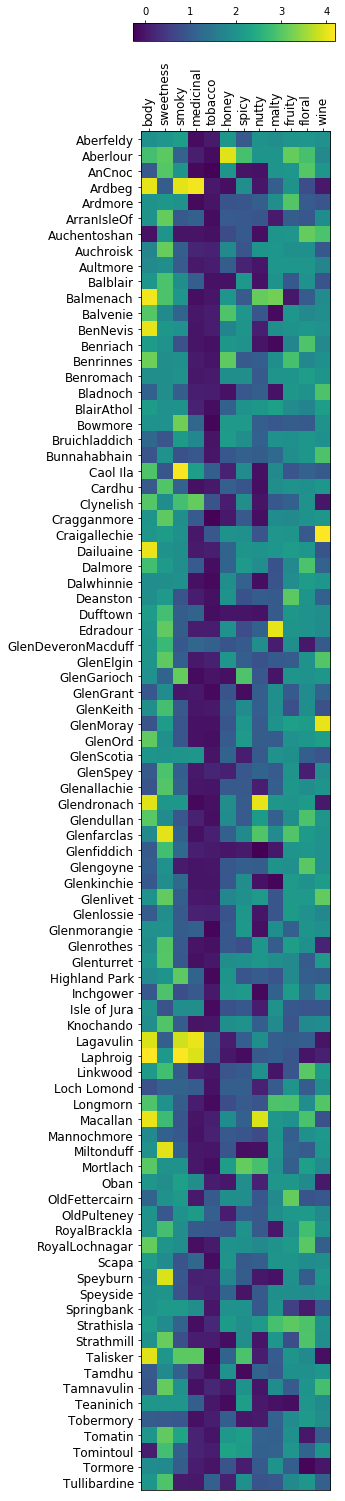

In [8]:
# show a plot of the whisky data
fig = plt.figure(figsize=(10,25))
ax = fig.add_subplot(1,1,1)

# image plot
img = ax.imshow(whisky)
ax.set_yticks(np.arange(len(distilleries)))
ax.set_yticklabels(distilleries, rotation="horizontal", fontsize=12)

# put the x axis at the top
ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation="vertical", fontsize=12)

# some horrific colorbar hackery to put in the right place
# don't worry about this bit!
cbaxes = fig.add_axes([0.37, 0.93, 0.28, 0.01])  
fig.colorbar(img, orientation='horizontal',  cax=cbaxes, ticks=np.arange(5))
cbaxes.xaxis.tick_top()

### Available data
You now have these variables:

* `whisky` an  86x12 array of taste judgements, one row for each of the 86 distilleries. Each whisky has a rating 0-4 for each of the 12 flavour categories.
* `distilleries` is a list of 86 distillery names
* `columns` is a mapping of feature names to column indices.
* `locations` is an 86x2 matrix of positions of each distillery in [OS grid reference format](https://www.gridreferencefinder.com/) in the same order as `whisky`

For example:

In [9]:
print(whisky[distilleries.searchsorted('Glenfiddich'), 
             columns['smoky']])

1.2551637969677651


will tell you how "smoky" Glenfiddich was rated.

In [10]:
print(distilleries[8]) # distilleries is just a list of names

Aultmore


will tell you the 9th distillery in the dataset is `Aultmore`.

In [11]:
print(locations[distilleries.searchsorted('Glengoyne')])

[252810 682750]


will tell you where to find the Glengoyne distillery in UK OS grid units (you can almost see it out of the BO720 / BO1028 window if you look northwest). 


## A: Norms, interpolation and statistics
We will see some simple things we can do with this dataset. 


We can compute distances in **flavour space** between distilleries.

For example, we can compute the distance between the `Glenlivet` distillery and every other distillery *in terms of flavour, not physical distance*. The result will be a 1D array of 86 distances. 

Remember: distance between $\mathbf{x}$ and $\mathbf{y}$ is the norm of their difference: $\|\mathbf{x}-\mathbf{y}\|$

We can compute this for several different norms (e.g. $L_1, L_2$, and $L_\infty$)

We start by subtracting the flavour vector for `Glenlivet` from all the other flavour vectors in the `whisky` matrix.

We then use `np.linalg.norm` to compute the norm of every row vector in the resulting matrix. We set `axis=1` to ensure that norms are calculated "across columns", i.e. the norm of each row vector is calculated. We also specify which norm we want to calculate (`1` for $L_1$, `2` for $L_2$ or `np.inf` for $L_\infty$). The result is a 1D array of 86 distances in **flavour space**.

In [16]:
# Get the flavour vector for Glenlivet
glenlivet = whisky[distilleries.searchsorted("Glenlivet")]
print(glenlivet)

[2.01755609 3.10969454 1.07845611 0.02881886 0.01150817 1.80465997
 1.958898   2.12901747 0.91876381 2.13262264 2.14421457 3.11448683]


In [14]:
## Compute distances
# must use axis=1 to get the right result, otherwise the matrix norm will be used
# (the matrix norm is calculated across the whole matrix, rather than across each row vector!)
glenlivet_1 = np.linalg.norm(whisky - glenlivet, 1, axis=1)  # L_1
glenlivet_2 = np.linalg.norm(whisky - glenlivet, 2, axis=1)  # L_2
glenlivet_inf = np.linalg.norm(whisky - glenlivet, np.inf, axis=1)  # L_inf

In [15]:
glenlivet_2

array([2.40539359, 3.27901719, 3.74206282, 7.26869293, 3.5959469 ,
       3.01153712, 3.99098367, 2.68978045, 3.58850521, 4.20329035,
       4.47422826, 2.83565822, 3.51337743, 3.10687837, 3.21539748,
       2.45589032, 2.96521245, 2.32944262, 3.4897409 , 3.67627438,
       2.47364195, 6.03827548, 3.13910293, 5.86616153, 3.58647884,
       2.7971574 , 3.58289697, 2.90159171, 2.99214765, 2.88074297,
       3.83637543, 3.69525582, 3.78177435, 1.93664302, 3.97814574,
       4.0661203 , 3.12805321, 2.50849017, 2.27269037, 4.35104289,
       3.39826017, 2.88034997, 4.61767457, 2.30581816, 2.20364032,
       3.98523638, 3.03374512, 3.20099541, 0.        , 3.10128801,
       3.39037191, 3.29555079, 1.86768193, 3.79088602, 3.10878391,
       4.93866945, 2.26822834, 6.98173174, 7.43713299, 2.45657591,
       3.76274243, 3.22321496, 3.90376958, 3.32601135, 3.89733321,
       3.0076623 , 4.93586653, 3.70024501, 4.35485768, 2.69615641,
       3.06090053, 2.78051463, 3.03727631, 3.06022421, 4.44449

### Visualising these distances
We can visualise these distances. This lets us see which distilleries produce whisky most similar to Glenlivet and which of them are most dissimilar. Note that we can use `argsort` to order a list of distances. Below, we plot a faceted graph, one facet for each norm, showing each distillery's flavour distance to `Glenlivet` as a socalled rank bar plot. The labels are a bit small, but the graphs are a useful summary of the distances in this abstract 12 dimensional space.

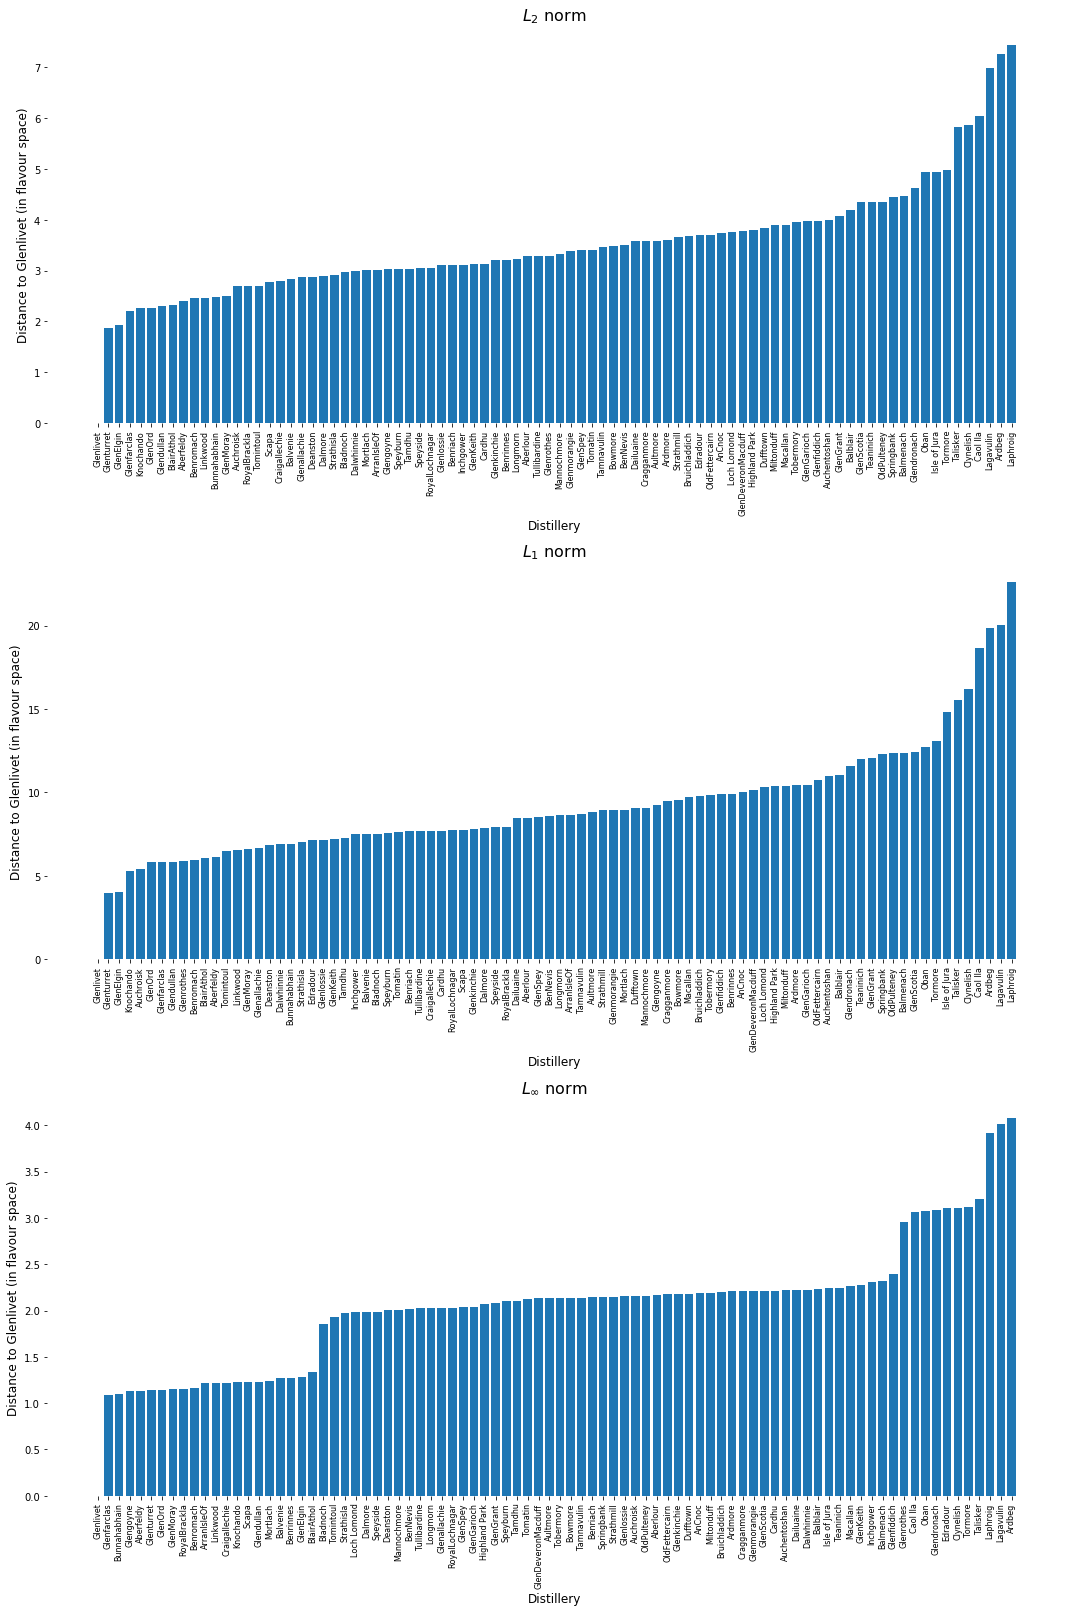

In [17]:
fig = plt.figure(figsize=(15, 22.5))

# you can use this utility function to
# help you get the xticklabels in order
def list_in_order(alist, order):
    """Given a list 'alist' and a list of indices 'order'
    returns the list in the order given by the indices"""
    return [alist[i] for i in order]


def rank_plot(distances):
    # find the ordering of the distances
    order = np.argsort(distances)
    # bar plot them
    ax.bar(np.arange(len(distances)), distances[order])
    ax.set_xlabel("Distillery", fontsize=12)
    ax.set_ylabel("Distance to Glenlivet (in flavour space)", fontsize=12)
    ax.set_xticks(np.arange(86))
    ax.set_frame_on(False)
    # make sure the same order is used for the labels!
    ax.set_xticklabels(
        list_in_order(distilleries, order), rotation="vertical", fontsize=8
    )


# make the plots
ax = fig.add_subplot(3, 1, 1)
ax.set_title("$L_2$ norm", fontsize=16)
rank_plot(glenlivet_2)
ax = fig.add_subplot(3, 1, 2)
ax.set_title("$L_1$ norm", fontsize=16)
rank_plot(glenlivet_1)
ax = fig.add_subplot(3, 1, 3)
ax.set_title("$L_\infty$ norm", fontsize=16)
rank_plot(glenlivet_inf)

# removes ugly overlapping
plt.tight_layout()

## Tasks (assessed)

**Task A.1 [auto-graded, with feedback]** 

Compute the $L_2$ norm of each distillery's flavour vector from the flavour vector corresponding to the distillery Glenfiddich, and store it in `glenfiddich_2`.

In [18]:
### BEGIN SOLUTION
glenfiddich_2 = np.linalg.norm(whisky - whisky[distilleries.searchsorted('Glenfiddich')], 2, axis=1)
### END SOLUTION

In [22]:
### BEGIN HIDDEN TESTS
# BSJ test
sh_true = array_hash(glenfiddich_2)
print(sh_true)
### END HIDDEN TESTS

with tick.marks(4):        
    assert(check_hash(glenfiddich_2, ((86,), 14614.647247600076)))

((86,), 14614.647247600076)


**Task A.2 [auto-graded with feedback]** 
Which distillery is furthest from Glenfiddich's flavour profile in the $L_2$ norm? Store the distillery name in the variable in `unlike_glenfiddich`. Note: compute this - do not hardcode it.


In [23]:
### BEGIN SOLUTION
unlike_glenfiddich = distilleries[np.argmax(glenfiddich_2)]
### END SOLUTION

In [24]:
print("The distillery most unlike Glenfiddich (according to the L2 norm) is {distillery}.".
          format(distillery=unlike_glenfiddich))

The distillery most unlike Glenfiddich (according to the L2 norm) is Lagavulin.


In [25]:
with tick.marks(3):        
    assert(case_crc(unlike_glenfiddich)==3089990555)

3089990555


**Note** from now on, use the $L_2$ norm if you need to compute any norms.


### Vector arithmetic
A client says to you:
    
>    I'd like something a bit more "mellow" than Tormore, in the same way that Glenmorangie is more "mellow" than Bowmore.

Which whisky should you recommend? 

We can work this out:
* What does more "mellow" mean? We don't have a "mellow" column.
    * But we do have a reference point: Bowmore -> Glenmorangie is somehow "mellow"
    * This "direction" between these flavour vectors is *also* a vector
* How do we combine Tormore's flavour profile with "mellow"? We can compose vectors by addition.
* How do we find a distillery that represents this profile? We can compute lengths of vectors using a norm.

**Task A.3** Compute:
* `mellow` A vector representing what "mellow" is.
* `hypothetical_flavour` A vector representing a hypothetical flavour that would be a more mellow version of Tormore.
* `recommendation` the name of a specific distillery that we might recommend, as a string.

**Note: this question is not subjective, nor does it require any trial-and-error or knowledge about whisky. Answer it directly using vector arithmetic.**

In [26]:
### BEGIN SOLUTION
tormore = whisky[distilleries.searchsorted('Tormore')]
bowmore = whisky[distilleries.searchsorted('Bowmore')]
glenmorangie = whisky[distilleries.searchsorted('Glenmorangie')]
mellow = glenmorangie - bowmore
hypothetical_flavour = tormore + mellow
distance_from_hypothetical = np.linalg.norm(whisky - hypothetical_flavour, 2, axis=1)
recommendation = distilleries[np.argmin(distance_from_hypothetical)]
### END SOLUTION

In [23]:
print("I would recommend {distillery} as a more 'mellow' version of Tormore.".format(distillery=recommendation))

I would recommend GlenGrant as a more 'mellow' version of Tormore.


In [24]:
with tick.marks(2):
    assert(check_hash(mellow, ((12,), -3.374787460507174)))

In [25]:
with tick.marks(2):
    assert(check_hash(hypothetical_flavour,((12,), 49.63291973521592)))

In [26]:
with tick.marks(1):
    assert(case_crc(recommendation)==3172520206)

3172520206


**Task A.4 [auto-graded with feedback]** 

Find the distillery that (as close as possible) makes a whisky twice as flavoursome across *all* flavours (in terms of the $L_2$ norm) as Glengarioch. Store the name in the variable `double_whisky`.

In [27]:
### BEGIN SOLUTION
glengarioch = whisky[distilleries.searchsorted('Glengarioch')]
double_flavour = glengarioch * 2
distances_to_double_flavour = np.linalg.norm(whisky - double_flavour, 2, axis=1)
double_whisky = distilleries[np.argmin(distances_to_double_flavour)]
### END SOLUTION

In [28]:
print("The whisky that is twice as flavoursome as Glengarioch is {distillery}.".format(distillery=double_whisky))

The whisky that is twice as flavoursome as Glengarioch is Strathisla.


In [29]:
with tick.marks(4):
    assert(case_crc(double_whisky)==1251638582)

1251638582


## Region flavours

We could say that the "representative" element of a collection of vectors was the one closest to the geometric centroid. This is given by the **mean vector** of a data set.

**Task A.5 [auto-graded, with feedback]** 

Compute the mean vector of all of the flavour vectors. Use it to find the names of two distilleries:
* `most_representative` The distillery with the **most** representative flavour profile
* `least_representative` The distillery with the **least** representative flavour profile

In [30]:
### BEGIN SOLUTION
mean_vector = np.mean(whisky, axis=0)
most_representative = distilleries[np.argmin(np.linalg.norm(whisky - mean_vector, 2, axis=1))]
least_representative = distilleries[np.argmax(np.linalg.norm(whisky - mean_vector, 2, axis=1))]
### END SOLUTION

In [31]:
print("The most representative whisky distillery is {most}, and the most unusual is {least}.".format(most=most_representative,
                                                                                           least=least_representative))

The most representative whisky distillery is Benromach, and the most unusual is Laphroig.


In [32]:
with tick.marks(4):
    assert(case_crc(most_representative)==125187962)
    assert(case_crc(least_representative)==2291391646)

125187962
2291391646



### A Whisky Map
The code below will show a map of Scotland, with the distilleries in their correct positions. Different geographic regions have different characteristic flavour profiles.

One very distinctive region is the **island** region. This is a region bounded roughly by the box

    95000, 625000 -> 183000, 860000
    
in the same OS grid units used in the `locations` array. This is highlighted on the map below.


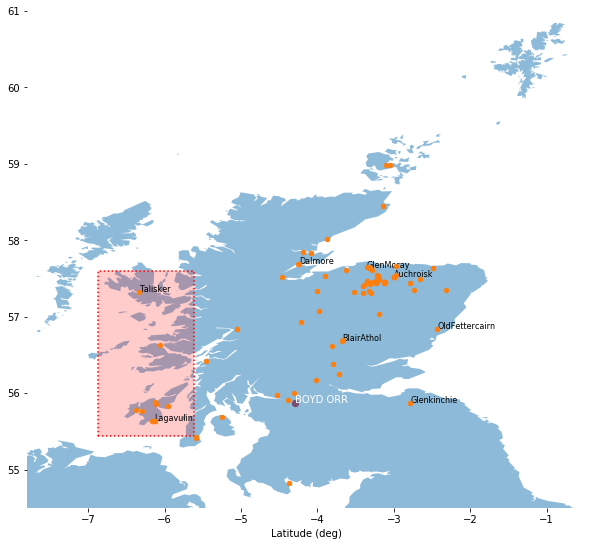

In [33]:
from whisky_map import draw_map, map_box

# draw each distillery label at the locations given.
ax = draw_map(locations, distilleries)

# show the island region
# draw a box in OS grid units
map_box(ax, 95000, 625000, 183000, 860000)

**Task A.6 [auto-graded, with feedback only for some questions]**


Find all distilleries in the island region and use this to answer these questions:
* `island_flavour`: Compute the most typical whisky flavour profile for island whiskies. (i.e. a 12 element vector).
* `most_typical_island`: The specific name of the distillery from the islands that is most typical of that region;
* `most_atypical_island`: The specific name of the distillery from the islands that is most atypical of that region (i.e. furthest from the typical);
* `most_typical_non_island`: The specific name of the distillery from **outside** island that is most typical of that region;
* `most_like_island`: The specific name of the distillery from **outside** the islands that is most like a typical island distillery.

**Note:** do not do any of this by hand. Write code.
Hint: Boolean arrays.

In [35]:
### BEGIN SOLUTION
is_island = (locations[:, 0] >= 95000) & (locations[:, 0] <= 183000) & (locations[:, 1] >= 625000) & (locations[:, 1] <= 860000)
island_distilleries = distilleries[is_island]
print(island_distilleries)
island_whisky = whisky[is_island]
island_flavour = np.mean(island_whisky, axis=0)
most_typical_island = island_distilleries[np.argmin(np.linalg.norm(island_whisky - island_flavour, 2, axis=1))]  # closest to mean
most_atypical_island = island_distilleries[np.argmax(np.linalg.norm(island_whisky - island_flavour, 2, axis=1))]  # closest to mean

non_island_distilleries = distilleries[~is_island]  # ~ stands for NOT
non_island_whisky = whisky[~is_island]
non_island_flavour = np.mean(non_island_whisky, axis=0)
most_typical_non_island = non_island_distilleries[np.argmin(np.linalg.norm(non_island_whisky - non_island_flavour, 2, axis=1))]  # closest to mean
most_like_island = non_island_distilleries[np.argmin(np.linalg.norm(non_island_whisky - island_flavour, 2, axis=1))] # non-island whisky closest to island mean

### END SOLUTION

['Ardbeg' 'Bowmore' 'Bruichladdich' 'Bunnahabhain' 'Caol Ila'
 'Isle of Jura' 'Lagavulin' 'Laphroig' 'Talisker' 'Tobermory']


In [36]:
with tick.marks(4):
    assert(check_hash(island_flavour, ((12,), 104.99538270254608)))

In [37]:
print("The most typical whisky of the island region is {most}.".format(most=most_typical_island))
print("The most atypical whisky of the island region is {most}.".format(most=most_atypical_island))
print("The most typical non-island whisky is {most}.".format(most=most_typical_non_island))
print("The non-island whisky most like island whiskies is {nonisland}.".format(nonisland=most_like_island))       

The most typical whisky of the island region is Isle of Jura.
The most atypical whisky of the island region is Tobermory.
The most typical non-island whisky is Benromach.
The non-island whisky most like island whiskies is GlenScotia.


In [33]:
with tick.marks(2):
    assert(case_crc(most_typical_island)==3459837550)

3459837550


In [38]:
print("The grading for this question is automatic but we have hidden the feedback; you'll have to wait for the final mark to see if you were correct or nor")

### BEGIN HIDDEN TESTS
#with tick.marks(2):    
tick_hidden += 1
assert(case_crc(most_atypical_island)==999830981)
tick_hidden_pass+=1

### END HIDDEN TESTS

The grading for this question is automatic but we have hidden the feedback; you'll have to wait for the final mark to see if you were correct or nor
999830981


In [39]:
print("The grading for this question is automatic but we have hidden the feedback; you'll have to wait for the final mark to see if you were correct or nor")

### BEGIN HIDDEN TESTS
#with tick.marks(2):    
tick_hidden += 2
assert(case_crc(most_typical_non_island)==125187962)
tick_hidden_pass+=2
    
### END HIDDEN TESTS

The grading for this question is automatic but we have hidden the feedback; you'll have to wait for the final mark to see if you were correct or nor
125187962


In [40]:
print("The grading for this question is automatic but we have hidden the feedback; you'll have to wait for the final mark to see if you were correct or nor")

### BEGIN HIDDEN TESTS
tick_hidden += 2
assert(case_crc(most_like_island)==3296151715)
tick_hidden_pass+=2
### END HIDDEN TESTS

The grading for this question is automatic but we have hidden the feedback; you'll have to wait for the final mark to see if you were correct or nor
3296151715


## Demeaning
The dataset that we have is unnormalised. It is a set of ratings, 0-4, and many of the attributes rated are very correlated (e.g. `smoky` and `medicinal`). Many of the ratings are also on quite different scales, with `tobacco` being much less likely to be rated 4 than `floral`.

It is easier to work with normalised data. 

**Task B.1**
Compute:
* `mean_vector` the average flavour profile (you should have this from part A already)
* `demeaned_whisky` that has the mean flavour vector removed. 



In [41]:
### BEGIN SOLUTION
mean_vector = np.mean(whisky, axis=0)
demeaned_whisky = whisky - mean_vector
### END SOLUTION

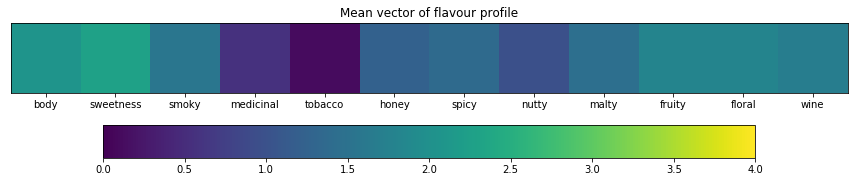

In [38]:
## Show the mean vector as an image strip
## Remember: this represents a point in space (a 12 dim vector) !
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1,1,1)
img = ax.imshow(mean_vector[None,:], cmap='viridis', vmin=0, vmax=4)
ax.set_xticklabels(columns)
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks([])
ax.set_title("Mean vector of flavour profile")
fig.colorbar(img, orientation='horizontal')

with tick.marks(2):
    assert(check_hash(demeaned_whisky, ((86, 12), -13044.960552493923)))

**Task B.2 [auto-graded, with feedback]**

Compute the **covariance matrix** of the *demeaned* data. Call this `whisky_cov`. 

**Note**: this should be a 12x12 matrix!

The covariance matrix tells us how different columns of the dataset are correlated (co-vary) with each other.

In [60]:
### BEGIN SOLUTION
whisky_cov = np.cov(demeaned_whisky, rowvar=False) # rowvar=False means that the variables are columns, not rows
# np.cov(demeaned_whisky.T) # alternatively, we can transpose the matrix so that the variables are rows
# The values on the diagonal show the variance (std^2) of each variable. This hasn't been normalised yet.
### END SOLUTION

In [61]:
with tick.marks(2):
    assert(check_hash(whisky_cov, ((12, 12), 611.8479842916136)))

**Task B.3 [12 marks, manually graded, a model solution will be provided]** 

Produce a figure visualizing the the `whisky_cov` covariance matrix as a heatmap (e.g. using `imshow`). The figure must follow best practice for scientific visualizaiton which means that it **must**;

- have informative labels on the x axis
- have informative labels on the y axis
- have include a colorbar
- use a suitable colormap that allows easy interpretation of correlations/covariance among variables (choose wisely from https://matplotlib.org/examples/color/colormaps_reference.html)
- include a suitable title. Additionally the title must also **include your student id and the value of `uuid_system` variable defined in the very beginning of this notebook**.

***Hint***: Confused about covariance and correlation? First read the lecture notes and recommended resources. You may also want to consult this video https://www.youtube.com/watch?v=KDw3hC2YNFc (focus on the intuition provided; not the specific equations).


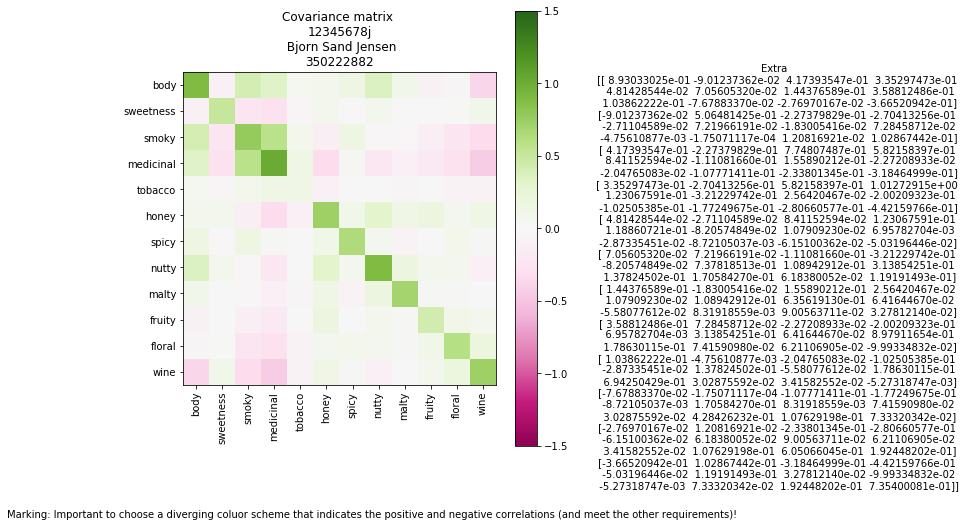

In [62]:
fig = plt.figure(figsize=(8, 8)) # Do not change the name of fig (this will be a two mark reduction!)

### BEGIN SOLUTION
tick_hidden+=5
tick_hidden_pass+=5

ax = fig.add_subplot(1,1,1)
img = ax.imshow(whisky_cov, cmap='PiYG', vmin=-1.5, vmax=1.5)
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
ax.set_yticklabels(columns)
ax.set_xticklabels(columns, rotation='vertical')
ax.set_title(("Covariance matrix \n12345678j\n Bjorn Sand Jensen\n%s") % (uuid_system))
fig.text(1.3,.05,("Extra \n %s" % (whisky_cov)), ha='center')
fig.colorbar(img)
# resize the figure to match the aspect ratio of the Axes    
fig.set_size_inches(7, 8, forward=True)

fig.text(0.5,0,("Marking: Important to choose a diverging coluor scheme that indicates the positive and negative correlations (and meet the other requirements)!"), ha='center')


fig.savefig("idss_lab_1_b3_cov_solution_extended.pdf", bbox_inches='tight') # this produces a pdf file which must be uploaded to Moodle
### END SOLUTION

# The following cmd produces a pdf file which must be uploaded to Moodle; 
# ... it is your responsibility to inspect the pdf before uploading!
# Do not change the name of idds_lab_1_b3_cov_answer.pdf (this will be a four mark reduction!)
fig.savefig("idss_lab_1_b3_cov_answer.pdf", bbox_inches='tight') 


**Task B.4 [8 marks; auto-graded without feedback except for the first test statement]**

From the figure you produced in Task B.3 (and/or by inspecting the `whisky_cov` variable) determine if the following statements are `True` or `False`:

* `B4_S0` = `fruity` flavor has almost zero ( < 0.00) covariance with `sweetness`? Hint: this is `True`!
* `B4_S1` = having `body` is negatively correlated with the `wine` flavour? 
* `B4_S2` = there is more variance around the mean along the `tobacco` dimension than along the `medicinal` dimension? 
* `B4_S3` = being `medicinal` and having `body` are independent aspects of a Whisky? 
* `B4_S4`=  being `smoky` is negatively correlated with having `sweetness`?
* `B4_S5`=  `nutty` is positively correlated with `body`? 
* `B4_S6`=  `medicinal` is negatively correlated with `body`? 
* `B4_S7` = being `smoky` is negatively correlated with `medicinal`? 
* `B4_S8` = `tobacco` is largely uncorrelated with other aspects of Whisky flavor (NB! this is True); therefore tobacco must have a low mean rating? 

In [63]:
## Note: you could provide code to evaluate these statements; but that is 
# not required in this case - a hardcoded answer is enough  

#B4_S0 = True/False # uncomment and select either True or False; For B4_S0, the answer is True, i.e. "B4_S0 = True"
#B4_S1 = True/False # uncomment and select either True or False; 
#B4_S2 = True/False # uncomment and select either True or False
#B4_S3 = True/False # uncomment and select either True or False
#B4_S4 = True/False # uncomment and select either True or False
#B4_S5 = True/False # uncomment and select either True or False
#B4_S6 = True/False # uncomment and select either True or False
#B4_S7 = True/False # uncomment and select either True or False
#B4_S8 = True/False # uncomment and select either True or False
#B4_S9 = True/False # uncomment and select either True or False

### BEGIN SOLUTION
B4_S0 = True
B4_S1 = True # having `body` is negatively correlated with the `wine` flavour? 
B4_S2 = False # there is more variance aorund mean of the tobacco dimension than along the medicinal dimension?
B4_S3 = False # being `medicinal` and having `body` are independent aspects of a Whisky? 
B4_S4 = True  # being `smoky` is negatively correlated with having `sweetness`? 
B4_S5 = True  #`nutty` is positively correlated with `body`? 
B4_S6 = False # `medicinal` is negatively correlated with `body`? 
B4_S7 = False # being `smoky` is negatively correlated with `medicinal`? 
B4_S8 = False # `tobacco` is largely uncorrelated with other aspects of Whisky flavor (NB! this is True); therefore tobacco must have a low mean rating? 
### END SOLUTION

In [64]:
# NB! you do not get any marks for this response as the answer is already provided; 
# ... it is just to make sure you know how to assign the True the variables

with tick.marks(0): 
    assert(check_hash(B4_S0, ((), array_hash(B4_S0)[1])))

In [44]:
### BEGIN HIDDEN TESTS
tick_hidden+=1
assert(check_hash(B4_S1, ((), array_hash(B4_S1)[1])))
tick_hidden_pass+=1
print("[1 marks]")
### END HIDDEN TESTS

[1 marks]


In [45]:
### BEGIN HIDDEN TESTS
tick_hidden+=1
assert(check_hash(B4_S2, ((), array_hash(B4_S2)[1])))
tick_hidden_pass+=1
print("[1 marks]")
### END HIDDEN TESTS

[1 marks]


In [46]:
### BEGIN HIDDEN TEST
tick_hidden +=1
assert(check_hash(B4_S3, ((), array_hash(B4_S3)[1])))
tick_hidden_pass+=1
print("[1 marks]")
### END HIDDEN TESTS

[1 marks]


In [47]:
### BEGIN HIDDEN TESTS
tick_hidden +=1
assert(check_hash(B4_S4, ((), array_hash(B4_S4)[1])))
tick_hidden_pass +=1
print("[1 marks]")
### END HIDDEN TESTS

[1 marks]


In [48]:
### BEGIN HIDDEN TESTS
tick_hidden+=1
assert(check_hash(B4_S5, ((), array_hash(B4_S5)[1])))
tick_hidden_pass+=1
print("[1 marks]")
### END HIDDEN TESTS

[1 marks]


In [49]:
### END HIDDEN TESTS
tick_hidden+=1
assert(check_hash(B4_S6, ((), array_hash(B4_S6)[1])))
tick_hidden_pass+=1
print("[1 marks]")
### END HIDDEN TESTS

[1 marks]


In [50]:
### BEGIN HIDDEN TESTS
tick_hidden+=1
assert(check_hash(B4_S7, ((), array_hash(B4_S7)[1])))
tick_hidden_pass+=1
print("[1 marks]")
### END HIDDEN TESTS

[1 marks]


In [51]:
### BEGIN HIDDEN TESTS
tick_hidden+=1
assert(check_hash(B4_S8, ((), array_hash(B4_S8)[1])))
tick_hidden_pass+=1
print("[1 marks]")
### END HIDDEN TESTS

[1 marks]


# Part C: Dimensionality reduction (for visualisation)

The Whisky ratings lie in a 12 dimensional vectors space which is difficult to understand for most humans. One very useful technique is to project data onto a lower dimensinal subspace, e.g. 2D, to visualise the data. This forms a simplified version of the data. We can map the data onto abritary vectors which migth be useful to our visual axes. In a simple example we migth choose to map the 12 dimensions onto the first two dimensions (e.g. removing the remaning 10 dimension without much consideration). This is perfectly valid and often the first step in any analysis.

This ability to map high dimensional vectors onto low dimensional (vector) spaces is a key technique in exploratory data analysis. 

We can compute a projection of a dataset onto an arbitrary set of vectors by forming a matrix product:
$$P = XV,$$

where $P$ is an $N\times k$ matrix that is the result of the projection, $X$ is the $N \times D$ original data set and $V$ is an $D \times k$ matrix, each of whose *columns* is a vector that we want to project onto.


**Task C.1 [manually graded]** 

Your manager has suggested that it would a good idea to plot the Whisky data, `demeaned_whisky` in a 2D interface so it it easy to visualize in her next power point presentation.

The manager has provided you with a couple of column vectors she thinks would be relevant to project onto, specifically;

$$\mathbf{v_1} = [1,0,0,0,0,0,0,0,0,0,0,0]^\top$$

$$\mathbf{v_2} = [0,0,0,0,0,0,0,0,0,0,0,1]^\top$$

The manager furthermore insist on using the aforementioned project method involving matrix multiplicaiton, i.e. 

$$P = XV,$$ where $V= [\mathbf{v}_1, \mathbf{v}_2]$ and $X$=`demeaned_whisky`.

Explain using less than 200 charaters why performing the suggested vector/matrix operation would be unnessesary (explanations with more than 200 characters will result in zero marks being awarded).

- `C1_EXPLANATION`: should be a string with your explanation. For full marks, your explanation must be consice, coherent and corretc without abreviations.

Your explanation will be saved to a txt file `idss_lab_1_[student_id]_c1_answer.txt` which must be uploaded to moodle). It is your responsibility to check that the answer is correct before uploading.

In [65]:
C1_EXPLANATION = "" 

### BEGIN SOLUTION
tick_hidden+=3
tick_hidden_pass+=3
C1_EXPLANATION = """
The two vectors are orthogonal and aligned with the standard basis (in which the data lies); 
projecting onto this space corresponds to simply plotting dimension 1 vs 12, i.e., no reason to do the matrix 
multiplication in the first place."
"""
### END SOLUTION

In [66]:
print("Your explanation:", C1_EXPLANATION)
fnc1 = ("idss_lab_1_%s_c1_answer.txt" % student_id)
with open(fnc1, "w") as text_file:
    text_file.write("%s [%s;%s]: %s" % (student_id, uuid_system, uuid_simple,C1_EXPLANATION))
    
print("Your answer has been saved to %s - remember to upload to moodle" % fnc1)

Your explanation: 
The two vectors are orthogonal and aligned with the standard basis (in which the data lies); 
projecting onto this space corresponds to simply plotting dimension 1 vs 12, i.e., no reason to do the matrix 
multiplication in the first place."

Your answer has been saved to idss_lab_1_1234567x_c1_answer.txt - remember to upload to moodle


**Task C.3 [manually graded]** 

Your manager now suggests two other (column) vectors of interest;


$$\mathbf{v_1} = [0.36, -0.48,  0.07, -0.06,  0.296, -0.09, -0.04,  0.5,  0.15, -0.24,  0.42, -0.016]^\top$$

$$\mathbf{v_2} = [-0.19, -0.04, -0.13, -0.43, -0.03, -0.5, -0.41,  0.14,  0.42,  0.30, -0.22, -0.013]^\top$$


Your task is to produce a figure (saved as pdf files and uploaded to moodle) that provides insigth into the projection of `demeaned_whisky` onto these vectors;

The plot should illustrate the results of projecting `demeaned_whisky` onto $v_1$ and $v_2$ vectors as a 2D scatter plot (i.e. plotting the resulting vectors/data points after the projecttion). Hint: you need to do the projection, then consider the collumns of $P$. For full marks, the figure must;
- contain a 2D scatter plot with 86 unique date points
- have informative labels on the x axis 
- have informative labels on the y axis 
- have suitable (i.e. equal) scaling of the axies 
- include informative labels on the projected data point/vectors (e.g.using `ax.text`); Hint: there are 86 relevant labels. 
- include a suitable title. Additionally the title must also **include your student id and the value of `uuid_system` variable defined in the very beginning of this notebook** 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

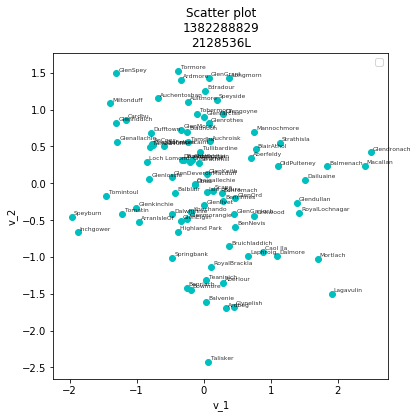

In [42]:
v1 = np.array([0.36, -0.48,  0.07, -0.06,  0.296, -0.09, -0.04,  0.5,  0.15, -0.24,  0.42, -0.016]).T
v2 = np.array([-0.19, -0.04, -0.13, -0.43, -0.03, -0.5, -0.41,  0.14,  0.42,  0.30, -0.22, -0.013]).T
v = np.vstack((v1,v2))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

### BEGIN SOLUTION
tick_hidden+=6
tick_hidden_pass+=6
xxa = demeaned_whisky @ v.T

for d in distilleries:
    xxx = xxa[distilleries==d,:]
    ax.scatter(xxx[:,0],xxx[:,1],color='c')
    ax.set_title(("%s\n%s\n%s") % ("Scatter plot",uuid_system, student_id))
    ax.text(xxx[:,0]+0.03,xxx[:,1]+0.03, d, fontdict={"size":6}, alpha=0.8)    
    ax.grid()
    plt.ylabel("v_2")
    plt.xlabel("v_1")

    fig.savefig("idds_lab_1_c3_solution.pdf", bbox_inches='tight') # this produces a pdf file which must be uploaded to Moodle
### END SOLUTION

# The following cmd produces a pdf file which must be uploaded to Moodle; 
# ... it is your responsibility to inspect the pdf before uploading!
# Do not change the name of idds_lab_1_c4_answer_solution.pdf (this will be a four mark reduction!)
fig.savefig("idss_lab_1_c3_answer.pdf", bbox_inches='tight') 


By projecting (via matrix/vector multiply), we have (hopefully) managed to map the high dimensional data onto a 2D space that is much easier for our human brain to understand; we can now understand the distances between distilleries. One caveat is that we have thrown information away (we will look into this problem in the next lab). Regardless, we now have a 2D map of the Scottish based on the flavors - not their geographical location.

**Task C.4 [manually graded]** 

An interesting question is what the "x" and "y" dimensions of $P$ actually represent.

The vectors we projected onto involves many of the orginal dimensions (as seen by the non-zero elements in the vector), specifically $v_1$ and $v_2$ are both a linear combinations of all of Whisky aspects/categories ("smokyness"," wine", etc). To understand what thsi means we often visualize the vectors as bar plots to understand the the most important factor.

You should now visualize the importance of each of the dimensions in $v_1$ and $v_2$ using a bar plot; the plot must have
- have informative labels on the x axis [2 marks]
- have informative labels on the y axis [2 marks]
- have include a colorbar [1 mark]    
- include a suitable title. Additionally the title must also **include your student id and the value of `uuid_system` variable defined in the very beginning of this notebook** [3 mark].

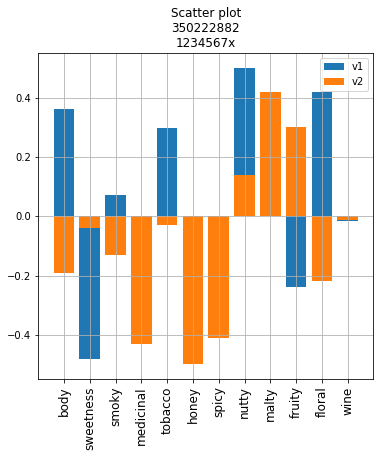

In [69]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

### BEGIN SOLUTION
tick_hidden+=3
tick_hidden_pass+=3
ax.bar(np.arange(12),v[0,:])
ax.bar(np.arange(12),v[1,:])
#ax.plot(v[:,1])
ax.grid()
ax.xaxis.tick_bottom()
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation="vertical", fontsize=12)
ax.set_title(("%s\n%s\n%s") % ("Scatter plot",uuid_system, student_id))
ax.legend(('v1','v2'))
fig.savefig("idds_lab_1_c4_solution.pdf", bbox_inches='tight') # this produces a pdf file which must be uploaded to Moodle
### END SOLUTION

# The following cmd produces a pdf file which must be uploaded to Moodle; 
# ... it is your responsibility to inspect the pdf before uploading!
# Do not change the name of idds_lab_1_c4_answer_solution.pdf (this will be a four mark reduction!)
fig.savefig("idss_lab_1_c4_answer.pdf", bbox_inches='tight') 



You should see that;
- `nutty` and`floral` are important in defining $v_1$
- `sweethness` is important for $v_1$
- `honey` is important for $v_2$
- ... and so on. You should notice that the factors defining v1 and v2 are quite different

We may even check if the two vectors are orthognal...


In [70]:
np.dot(v1,v2)

They are (almost orthogonal), i.e. "90" degress to each other. They are are in fact (approximately) the eigenvectors of the covariance matrix for this dataset, i.e principle components. This means that they define the direction of largest variance (the topic for the next lab) and v1 and v2 identify the .

---

# Appendix: Marking Summary (and other metadata)

### Autograded questions:

In [71]:
print("This fraction represents your performance on the autograded part of the lab:")
tick.summarise_marks()

print("50\% of the lab")

This fraction represents your performance on the autograded part of the lab:


50\% of the lab


### Autograded / manually graded questions without feedback

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b><font size=5> Hidden/manual questions accounts for 50\% of the lab </font></b>

In [72]:
### BEGIN HIDDEN TESTS
thisisabackupforinsertingmisccontentposthoc1=123456789
thisisabackupforinsertingmisccontentposthoc2=987654321
print(tick_hidden)
print(tick_hidden_pass)
### END HIDDEN TESTS

58
58
